# Scaling Relation Analysis


In [33]:
import sys
sys.path.insert(0, '../../src/')

import numpy as np
import matplotlib.pyplot as plt
import pickle
import config
from tqdm.notebook import tqdm

from basis_gates import *
from agents import *
from environments import *
from models import *
from utils import *
%matplotlib inline

np.set_printoptions(precision = 3)

## One Qubit, Small Rotations

In [34]:
length1 = np.array(loader(data_path("length_list_oneQubit_FUMC_Nofix.data")))
length2 = np.array(loader(data_path("length_list_oneQubit_FUMC_Fix.data")))
length3 = np.array(loader(data_path("length_list_oneQubit_FISC_Nofix.data")))
length4 = np.array(loader(data_path("length_list_oneQubit_FISC_Fix.data")))

a = 1/(1-0.99)
b = 1/(1-0.999)
x = np.e**np.linspace(np.log(a), np.log(b), 5)
x_array = np.e**np.linspace(np.log(a), np.log(b), 100)

tol_list = 1 - 1/x
tol_array = 1 - 1/x_array

c1, k1 = fit_function(logarithmic_target, (tol_list, length1), (1, 30))
c2, k2 = fit_function(logarithmic_target, (tol_list, length2), (1, 30))
c3, k3 = fit_function(logarithmic_target, (tol_list, length3), (1, 30))
c4, k4 = fit_function(logarithmic_target, (tol_list, length4), (1, 30))

1.4943806663638601 47.64944956937086
1.4138893319265717 48.406006442450504
1.430151361263782 23.673358473582162
1.2583399443969778 26.223068442953455


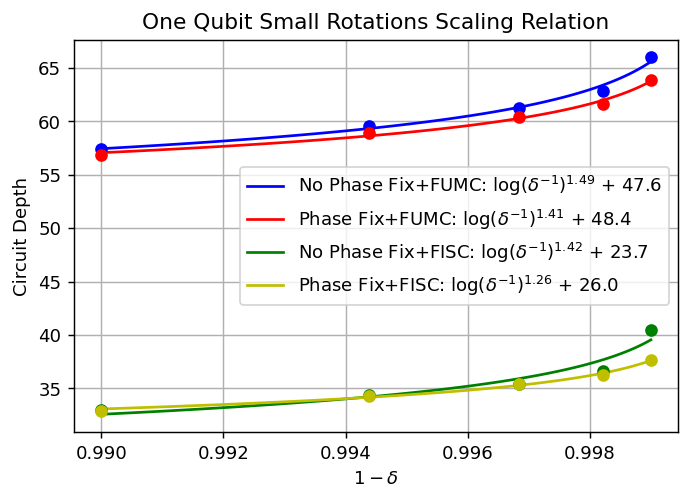

In [39]:
print(c1, k1)
print(c2, k2)
print(c3, k3)
print(c4, k4)

fig=plt.figure(figsize=(6,4), dpi = 130, facecolor='w', edgecolor='k')

plt.title("One Qubit Small Rotations Scaling Relation")
plt.plot(tol_array, np.log(1/(1-tol_array))**c1 + k1, "b-")
plt.plot(tol_array, np.log(1/(1-tol_array))**c2 + k2, "r-")
plt.plot(tol_array, np.log(1/(1-tol_array))**c3 + k3, "g-")
plt.plot(tol_array, np.log(1/(1-tol_array))**c4 + k4, "y-")

plt.plot(tol_list, length1, "bo")
plt.plot(tol_list, length2, "ro")
plt.plot(tol_list, length3, "go")
plt.plot(tol_list, length4, "yo")

plt.legend(["No Phase Fix+FUMC: $\log(\delta^{-1})^{1.49}$ + 47.6", 
            "Phase Fix+FUMC: $\log(\delta^{-1})^{1.41}$ + 48.4", 
            "No Phase Fix+FISC: $\log(\delta^{-1})^{1.42}$ + 23.7",
            "Phase Fix+FISC: $\log(\delta^{-1})^{1.26}$ + 26.0"])
plt.xlabel("$1- \delta$")
plt.ylabel("Circuit Depth")
plt.grid()
plt.savefig(image_path("one_qubit_scaling.pdf"))
plt.show()

## Two Qubits, Small Rotations

In [26]:
length = loader(data_path("length_list2.data"))
length = length.reshape(5,1)

a = 1/(1-0.95)
b = 1/(1-0.995)
x = np.e**np.linspace(np.log(a), np.log(b), 5)
x_array = np.e**np.linspace(np.log(a), np.log(b), 100)

tol_list = 1 - 1/x
tol_array = 1 - 1/x_array

c1, k1 = fit_function(logarithmic_target, (tol_list, length[:,0]), (1, 30))

1.8272979629983952 72.42751078788037


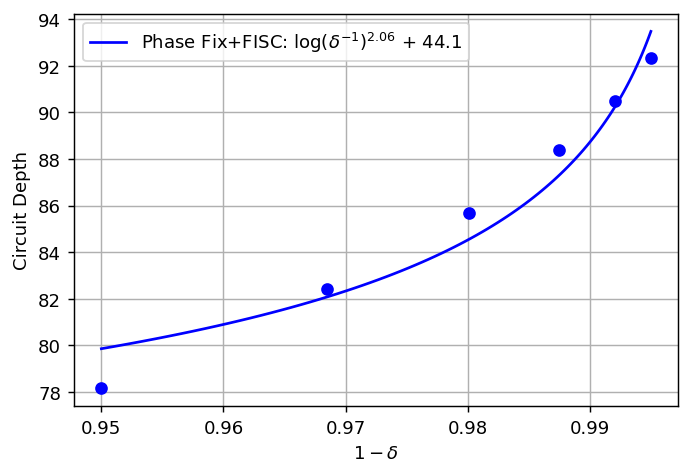

In [27]:
print(c1, k1)

fig=plt.figure(figsize=(6,4), dpi = 130, facecolor='w', edgecolor='k')

plt.plot(tol_array, np.log(1/(1-tol_array))**c1 + k1, "b-")
#plt.plot(tol_array, np.log(1/(1-tol_array))**c2 + k2, "r-")
#plt.plot(tol_array, np.log(1/(1-tol_array))**c3 + k3, "g-")

plt.plot(tol_list, length[:,0], "bo")
#plt.plot(tol_list, length[:,1], "ro")
#plt.plot(tol_list, length[:,2], "go")

plt.legend(["Phase Fix+FISC: $\log(\delta^{-1})^{2.06}$ + 44.1"])
plt.xlabel("$1- \delta$")
plt.ylabel("Circuit Depth")
plt.grid()
plt.savefig(image_path("two_qubit_scaling.pdf"))
plt.show()